

# Project: Analysis of No-Show Medical Appointment Data From Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data shows the demographics for 110,527 no-show medical applointments. No-show is defined as a person, who has a scheduled appointment, does not show up for that appointment. Data came from Kaggle https://www.kaggle.com/joniarroba/noshowappointments. There are 14 columns in the dataframe. A description of the data is as follows:

PatientId - Identification of a patient 

AppointmentID - Identification of each appointment 

Gender = Male or Female 

Appointment Day = The day of the appointment

Scheduled Day = The day someone called or registered the appointment, this is before appointment of course

Age

Neighbourhood = Where the appointment takes place

Scholarship = True or False

Hypertension (column name = hipertension) = True or False 

Diabetes = True or False 

Alcoholism = True or False 

Handicap (column name = Handcap) = True or False 

SMS_received = 1 or more messages sent to the patient

No-show = True or False
> 

In [4]:
##Import numpy, pandas, matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

Load the data from the Kaggle website. Take an initial look at the information contained in the dataframe.

In [5]:
df = pd.read_csv('Appointment Data.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Further analysis on the dataframe indicates that there are 110527 rows of data with no null values. A statistical description of the data gives an overview. Initial inspection shows that the maximum age of all patients is 115. 

In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 14 columns included in the dataframe. Of those, PatientID, AppointmentID, and ScheduledDay are unlikely to yield insight into why patients skip healthcare appointments or to explain how to increase compliance in showing up for appointments. Remove these columns.

In [9]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'], axis = 1, inplace = True)

In [10]:
df.head(5)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning: Making the Data Easier to Analyze

Change text data to numerical data and extract the month and day of week from the appointment date to form two new columns.

In [11]:
import datetime as dt

In [12]:
 df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
 df['Month'] = df['AppointmentDay'].dt.month
 df['WeekDay'] = df['AppointmentDay'].dt.weekday
 

In [13]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.No_show.replace(['Yes', 'No'], [1, 0], inplace=True)
df.Gender.replace(['F', 'M'], [1, 0], inplace = True)
df.head(5)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Month,WeekDay
0,1,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4
1,0,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4
2,1,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,4
3,1,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,4
4,1,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,4


<a id='eda'></a>
## Exploratory Data Analysis



### What factors affect the ability to keep an appointment?

A quick look at the visual data by column does not show anything unusual.

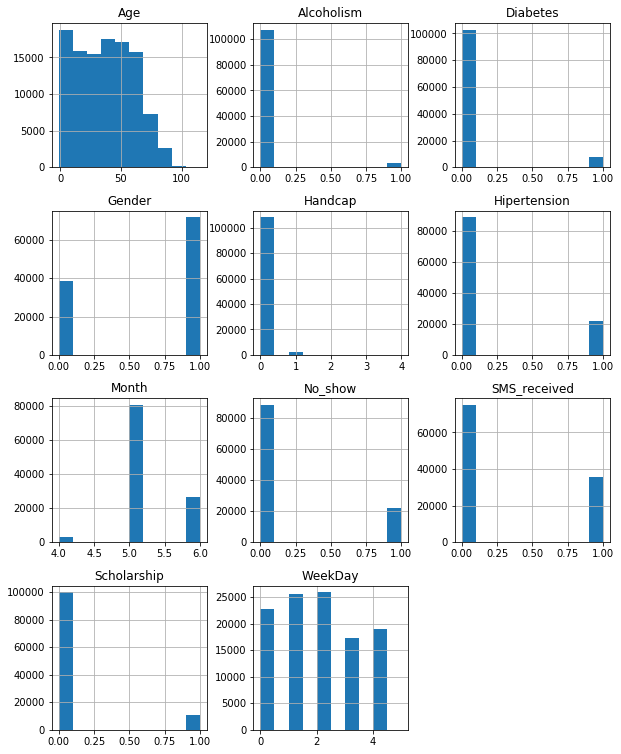

In [14]:
df.hist(figsize = (10, 13));

Calcualting correlation across the data shows weak correlations between all data points except for SMS_received and No_show. This correlation is moderate.

In [15]:
show = df.No_show == 0
no_show = df.No_show == 1

In [16]:
df.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Month,WeekDay
Gender,1.000000,0.106440,0.114293,0.055718,0.032554,-0.106167,-0.022814,0.046298,0.004119,0.006051,-0.003916
Age,0.106440,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319,0.014547,0.003088
Scholarship,0.114293,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135,-0.002588,-0.000673
Hipertension,0.055718,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701,0.003779,0.003455
Diabetes,0.032554,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180,0.003741,0.006614
Alcoholism,-0.106167,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196,0.003920,0.002701
Handcap,-0.022814,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076,-0.001479,0.004352
SMS_received,0.046298,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431,0.108070,-0.089858
No_show,0.004119,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000,-0.020886,0.001165
Month,0.006051,0.014547,-0.002588,0.003779,0.003741,0.003920,-0.001479,0.108070,-0.020886,1.000000,-0.062496


Looking at the correlations between No-show appointments and all of the types of observations resulted in the following:
There is a 20% rate of no-show appointments across all appointments. The percentage of appointments missed by females and those missed by males was the same, with females missing 20.31% of all appointments scheduled by women and males missing 19.97% of all appointments scheduled by males. This includes patients at all ages.

In [17]:
df.No_show.value_counts()

0    88208
1    22319
Name: No_show, dtype: int64

In [18]:
df.No_show[no_show].count() / df.No_show.count() * 100

20.193255946510806

In [19]:
df.Gender.value_counts()

1    71840
0    38687
Name: Gender, dtype: int64

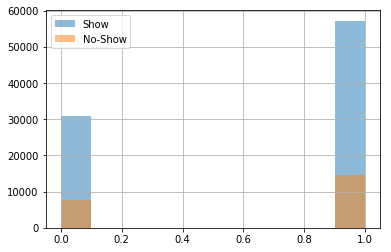

In [20]:
df.Gender[show].hist(alpha = 0.5, label = 'Show')
df.Gender[no_show].hist(alpha = 0.5,label = 'No-Show')
plt.legend();

In [21]:
male = df.Gender == 0
female = df.Gender == 1

In [23]:
df.Gender[no_show].value_counts()

1    14594
0     7725
Name: Gender, dtype: int64

In [26]:
female_no_show = 14594/71840
female_no_show

0.20314587973273943

In [27]:
male_no_show = 7725/38687
male_no_show

0.19967947889471915

In [28]:
df.Gender[no_show].value_counts() / df.Gender.count() * 100

1    13.204013
0     6.989242
Name: Gender, dtype: float64

A graph of the age data shows that most missed appointments are for ages birth through about 30-years-old, where the no-show rate begins to taper slightly. There is another drop in missed appointments at age 50 and a significant drop about age 65. This could account for the increase in medical issues with age or a more serious approach to health with aging. Additionally, younger adults have more responsibilities and less personal time, possibly accounting for some of the no-show appointments. 

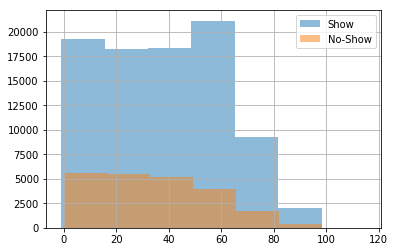

In [30]:
df.Age[show].hist(alpha = 0.5, bins = 7, label = 'Show')
df.Age[no_show].hist(alpha = 0.5, bins = 7, label = 'No-Show')
plt.legend();

The percentages of no-show appointments for patients with serious chronic medical conditions such as alcoholism, diabetes, and handicaps is low, although diabetic patients account for a more than 6% rate of missed appointments. Patients with hypertension miss appointments at a rate of 16.9%. This could possibly be explained by the rate of hypertension in the population. Patients on 'scholarship' miss about 11.5% of their appointments. Economic factors such as inability to pay, inability to leave work, or lack of transportation may explain a portion of these missed appointments.

A quick look at the locations of the appointments indicate that location may play a part in patients missing appointments. However, there is not sufficient data to research a trend. 

In [31]:
df.Alcoholism[no_show].value_counts() / df.Alcoholism[no_show].count() * 100

0    96.96671
1     3.03329
Name: Alcoholism, dtype: float64

In [32]:
df.Diabetes[no_show].value_counts() / df.Diabetes[no_show].count() * 100

0    93.592903
1     6.407097
Name: Diabetes, dtype: float64

In [33]:
df.Scholarship[no_show].value_counts() / df.Scholarship[no_show].count() * 100

0    88.449303
1    11.550697
Name: Scholarship, dtype: float64

In [34]:
df.groupby('Neighbourhood')['No_show'].value_counts()

Neighbourhood        No_show
AEROPORTO            0             7
                     1             1
ANDORINHAS           0          1741
                     1           521
ANTÔNIO HONÓRIO      0           221
                     1            50
ARIOVALDO FAVALESSA  0           220
                     1            62
BARRO VERMELHO       0           332
                     1            91
BELA VISTA           0          1523
                     1           384
BENTO FERREIRA       0           665
                     1           193
BOA VISTA            0           254
                     1            58
BONFIM               0          2223
                     1           550
CARATOÍRA            0          1974
                     1           591
CENTRO               0          2631
                     1           703
COMDUSA              0           254
                     1            56
CONQUISTA            0           689
                     1           160
CONSOLAÇÃ

In [35]:
df.Hipertension[no_show].value_counts() / df.Hipertension[no_show].count() * 100

0    83.099601
1    16.900399
Name: Hipertension, dtype: float64

In [36]:
df.Handcap[no_show].value_counts() / df.Handcap[no_show].count() * 100

0    98.176442
1     1.639858
2     0.165778
3     0.013441
4     0.004480
Name: Handcap, dtype: float64

The most unexpected value in the dataset is the 43.8% of missed appointments for patients who received a text message. Healthcare providers are increasingly using these types of messages to remind patients of their appointments, often multiple times prior to the date of service. 

The data from the date of appointment is as expected, with appointments missed mostly on Mondays, Tuesdays, and Sundays, respectively. The data for the month of service is calculated. However, because appointment data was only reported for three months of the year, a conclusion cannot be drawn from it.  

In [37]:
df.SMS_received[no_show].value_counts() / df.SMS_received[no_show].count() * 100

0    56.162911
1    43.837089
Name: SMS_received, dtype: float64

In [38]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [39]:
df.Month[no_show].value_counts() / df.Month[no_show].count() * 100

5    75.290112
6    21.873740
4     2.836149
Name: Month, dtype: float64

In [40]:
df.Month.value_counts()

5    80841
6    26451
4     3235
Name: Month, dtype: int64

In [41]:
df.WeekDay[no_show].value_counts() / df.WeekDay[no_show].count() * 100

1    23.083471
2    22.819123
0    21.013486
4    18.087728
3    14.955867
5     0.040324
Name: WeekDay, dtype: float64

<a id='conclusions'></a>
## Conclusions

A comprehensive look at the data included in this dataset indicates that the factors most affecting patient compliance with appointments are age, income level, and day of the week. Inititially, it appeared that gender was a significant factor in whether or not patients kept their appointments because of the greater number of appointments missed by females over males. A closer look at the data shows that females and males miss appointments at about the same rate (20.31% and 19.97%), but that females schedule a greater number of appointments.

Patients with serious chronic health problems are not very likely to miss appointments. However, more than 10% of low-income patients miss appointments.

Most missed appointments, around 67%, are missed at the beginning of the week. And, text message reminders have around a 56% success rate of ensuring a patient makes it to an appointment.

While this analysis of missed appointment data is limited in scope, it offers some information regarding where improvements can be made in health services. Initiatives could include offering appointments in different locations, offering services at lower cost in some areas, and encouraging employers to allow paid personal time for health appointments.



In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

Resources used or viewed:
Course materials

Stack Overflow

Python/Numpy/Pandas/Matplotlib Libraries

Safari Matplotlib Cookbook

NIH study on missed appointments for reference and background.

Information on Kaggle regarding dataset.